# KEYWORDS EXTRACTION WITH DIFFERENT TECHNIQUES

The aim of this work is to try three different classical techniques in order to extract keywords. After that, we are going to use a BERT approach and compare the results that were obtained.

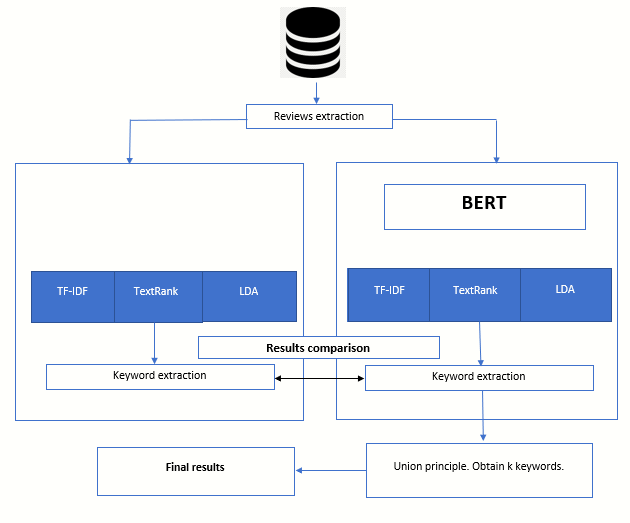

In [3]:
#import data
from google.colab import files
uploaded = files.upload()

Saving Starbucks.txt to Starbucks.txt


# 1. Sentence extraction from reviews


We are going to prove our approach with a bunch of reviews which belongs to important business. Such as MacDonalds, Starbucks and CVS Pharmacy

The first step is simple: storage all theh reviews on different lists.

In [4]:
CVS_Pharmacy_Reviews = []
CVS_Pharmacy_Sentences_len =[]

file1 = open('CVS_Pharmacy.txt', 'r')
Lines = file1.readlines()

for line in Lines:
  CVS_Pharmacy_Reviews.append(line.strip())

In [5]:
CVS_Pharmacy_Sentences = []
for r in CVS_Pharmacy_Reviews:
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>1):
      CVS_Pharmacy_Sentences.append(sentence)
      CVS_Pharmacy_Sentences_len.append(len(sentence))

In [6]:
McDonalds_Reviews = []
McDonalds_Sentences_len=[]

file1 = open('McDonalds.txt', 'r')
Lines = file1.readlines()

for line in Lines:
  McDonalds_Reviews.append(line.strip())

In [7]:
McDonalds_Sentences = []
for r in McDonalds_Reviews:
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>1):
      McDonalds_Sentences.append(sentence)
      McDonalds_Sentences_len.append(len(sentence))

In [8]:
Starbucks_Reviews = []
Starbucks_Sentences_len=[]

file1 = open('Starbucks.txt', 'r')
Lines = file1.readlines()

for line in Lines:
  Starbucks_Reviews.append(line.strip())

In [9]:
Starbucks_Sentences = []
for r in Starbucks_Reviews:
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>1):
      Starbucks_Sentences.append(sentence)
      Starbucks_Sentences_len.append(len(sentence))

After that, the second step is the following: study the most commont length of the senntences -from the reviews-, and delete the outliers -based on the lenght-. 

In [10]:
#Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

*1.1 CSV Pharmacy*

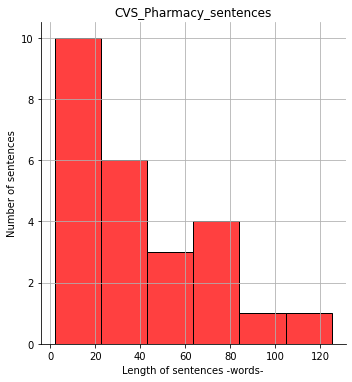

In [11]:
sns.displot(CVS_Pharmacy_Sentences_len,color='red')
plt.title('CVS_Pharmacy_sentences')
plt.xlabel('Length of sentences -words-')
plt.ylabel('Number of sentences')
plt.grid()

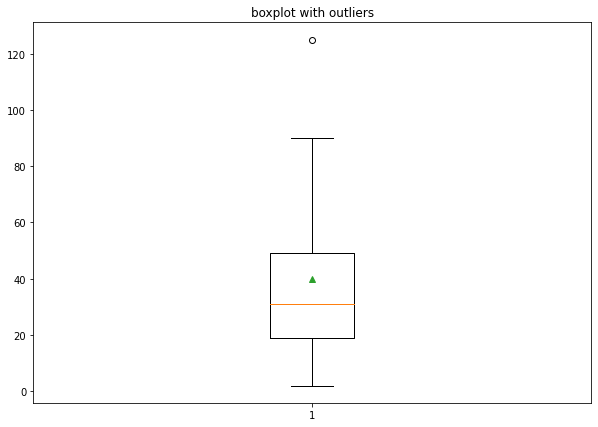

In [12]:
#BoxPlot
fig = plt.figure(figsize =(10, 7))
# Creating plot
bp = plt.boxplot(CVS_Pharmacy_Sentences_len,showmeans=True) 
# show plot
plt.title("boxplot with outliers")
plt.show()

In [13]:
medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
means = [round(item.get_ydata()[0], 1) for item in bp['means']]
print(f'Medians: {medians}\n'
      f'Means:   {means}')

Medians: [31.0]
Means:   [39.8]


In [14]:
q1_CSV_Pharmacy = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3_CSV_Pharmacy= [round(max(item.get_ydata()), 1) for item in bp['boxes']]
print(f'Q1: {q1_CSV_Pharmacy}\n'
      f'Q3: {q3_CSV_Pharmacy}')

Q1: [19.0]
Q3: [49.0]


In [18]:
#CVS_Pharmacy_Sentences

In [16]:
FilterReviewsCVSPharmacy = []
totalFilterSentecesCVSPharmacy = 0

for r in CVS_Pharmacy_Reviews:
  SReview=[]
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>q1_CSV_Pharmacy[0]):
      totalFilterSentecesCVSPharmacy+=1
      SReview.append(sentence.lower())
  FilterReviewsCVSPharmacy.append(SReview)

print(f"The total of filter sentences are {totalFilterSentecesCVSPharmacy}")

The total of filter sentences are 18


In [17]:
FilterReviewsCVSPharmacy

[[" i think they're fantastic people here- better than other cvs stores i've visited and used"],
 ['late-night supply run'],
 ['bottled water is always on sale',
  ' my building has really old pipes, the water smells funny, and taste like crap'],
 [],
 ['this place is hell between cashiers who could careless and the auto check out',
  ' note to self never return!'],
 [],
 ['major renovations in progress, lots of new self checkout stations'],
 ['worst drugstore ever', ' you shold call it the dollar store instead since'],
 ['now carrying eyes lips face cosmetics!'],
 ["has the essentials but often doesn't have what i'm looking for (specific brands of sonicare brushes, my favorite cereal, etc)"],
 ['the bird and the bee playing on the pa, awesome'],
 ['good selection for a pharmacy',
  ' good value/savings with cvs care card',
  ' also, the employees are very friendly, knowledgeable and helpful!'],
 ['pharmacy slow with big line at 7pm'],
 [' but items are marked up at this location  '],


*1.2 McDonalds*

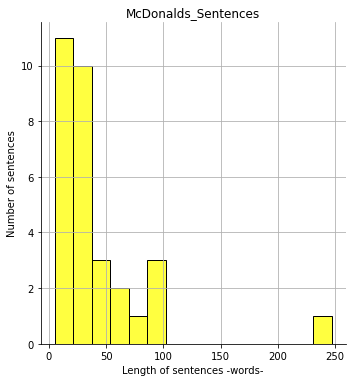

In [19]:
sns.displot(McDonalds_Sentences_len,color='yellow')
plt.title('McDonalds_Sentences')
plt.xlabel('Length of sentences -words-')
plt.ylabel('Number of sentences')
plt.grid()

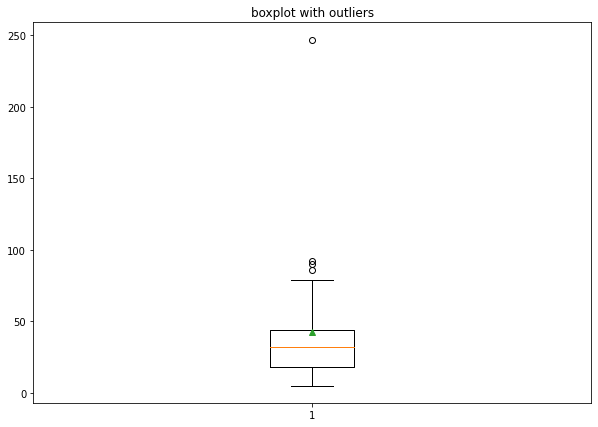

In [20]:
#BoxPlot
fig = plt.figure(figsize =(10, 7))
# Creating plot
bp = plt.boxplot(McDonalds_Sentences_len,showmeans=True) 
# show plot
plt.title("boxplot with outliers")
plt.show()

In [21]:
medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
means = [round(item.get_ydata()[0], 1) for item in bp['means']]
print(f'Medians: {medians}\n'
      f'Means:   {means}')

Medians: [32.0]
Means:   [42.1]


In [22]:
q1_McDonalds = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3_McDonalds= [round(max(item.get_ydata()), 1) for item in bp['boxes']]
print(f'Q1: {q1_McDonalds}\n'
      f'Q3: {q3_McDonalds}')

Q1: [18.0]
Q3: [43.5]


In [23]:
FilterReviewsMcDonalds = []
totalFilterSentecesMcDonalds = 0

for r in McDonalds_Reviews:
  SReview=[]
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>q1_McDonalds[0]):
      totalFilterSentecesMcDonalds+=1
      SReview.append(sentence.lower())
  FilterReviewsMcDonalds.append(SReview)

print(f"The total of filter sentences are {totalFilterSentecesMcDonalds}")

The total of filter sentences are 21


*1.3 Starbucks*

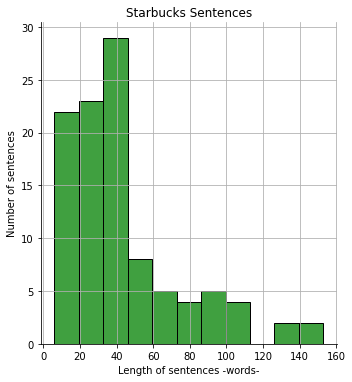

In [24]:
sns.displot(Starbucks_Sentences_len,color='green')
plt.title('Starbucks Sentences')
plt.xlabel('Length of sentences -words-')
plt.ylabel('Number of sentences')
plt.grid()

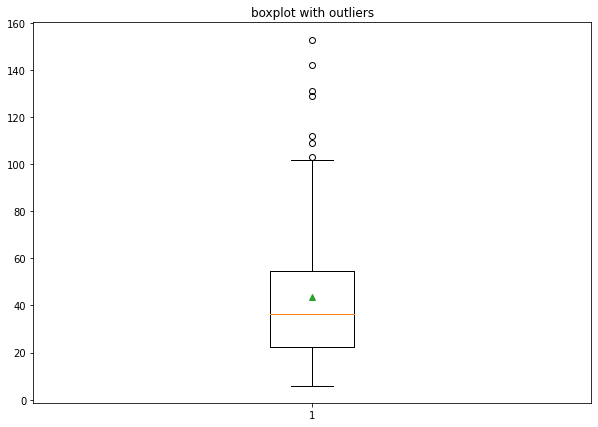

In [25]:
#BoxPlot
fig = plt.figure(figsize =(10, 7))
# Creating plot
bp = plt.boxplot(Starbucks_Sentences_len,showmeans=True) 
# show plot
plt.title("boxplot with outliers")
plt.show()

In [26]:
medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
means = [round(item.get_ydata()[0], 1) for item in bp['means']]
print(f'Medians: {medians}\n'
      f'Means:   {means}')

Medians: [36.5]
Means:   [43.8]


In [27]:
q1_Starbucks = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3_Starbucks= [round(max(item.get_ydata()), 1) for item in bp['boxes']]
print(f'Q1: {q1_Starbucks}\n'
      f'Q3: {q3_Starbucks}')

Q1: [22.5]
Q3: [54.5]


In [28]:
FilterReviewsStarBucks = []
totalFilterSentecesStarBucks = 0

for r in Starbucks_Reviews:
  SReview=[]
  aux = r.split(".")
  for sentence in aux:
    if(len(sentence)>q1_Starbucks[0]):
      totalFilterSentecesStarBucks+=1
      SReview.append(sentence.lower())
  FilterReviewsStarBucks.append(SReview)

print(f"The total of filter sentences are {totalFilterSentecesStarBucks}")

The total of filter sentences are 78


# 2. TF-IDF

*2.1 TF-IDF application*

In information retrieval, tf–idf (also TF*IDF, TFIDF, TF–IDF, or Tf–idf), short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In our particular case, the corpus is a mix of reviews that have been made by some clients.

In [29]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 

In [30]:
#Import stopwords is a must
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
#We are going to use this link, because it has a really big collection of stopwords.
import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stop_words = set(stopwords_list.decode().splitlines()) 

An interesting approach is to add custom stopwords based on the business.

In [33]:
stop_words.add('starbucks')
#stop_words.add('csv pharmacy')
#stop_words.add('csv')
#stop_words.add('McDonalds')
#stop_words.add("McDonald's")

In [34]:
print('starbucks' in stop_words)
#print('csv pharmacy' in stop_words)
#print('csv' in stop_words)
#print('McDonalds' in stop_words)
#print("McDonald's" in stop_words)

True


In [35]:
'''
  Here you can change the business
'''
totalReviewsIDF = FilterReviewsStarBucks

In [38]:
'''
  Input: bunch of reviews
  Ouput: Not empty reviews
'''
def removeEmptyReviews(dataset):
  dataset = [x for x in dataset if x]
  return dataset

In [39]:
FiltertotalReviewsIDF = removeEmptyReviews(totalReviewsIDF)

Is is a must to define a preprocessing stage...

In [41]:
'''
 Input: string
 Output: preprocessed string
'''
def preprocessing(sentence):
    sentence = toLowerCase(sentence)
    sentence = removePunctuation(sentence)
    sentence = removeApostrophe(sentence)
    sentence = removeCharactersLengthOne(sentence)
    sentence = numberConvert(sentence)
    sentence = removeStopWords(sentence)
    #is it possible to use stemming
    sentence = lemmatization(sentence)
    sentence = removePunctuation(sentence)
    return sentence

In [50]:
pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from num2words import num2words

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [44]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [45]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [55]:
'''
 Input: string with numeric values
 Output: string without numeric values
'''
def numberConvert(sentence):
  sentence = str(sentence)
  filter = []
  word_tokens = word_tokenize(sentence)
  for  w in word_tokens:
    if(w.isnumeric()):
      filter.append(num2words(w))
    else:
      filter.append(w)
  filter = " ".join(filter)
  return str(filter)


'''
 Input: string 
 Output: string in lowercase
'''
def toLowerCase(sentence):
  return sentence.lower()


'''
 Input: string 
 Output: string without punctuation
'''
def removePunctuation(sentence):
  symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
  for i in symbols:
    sentence = np.char.replace(sentence, i, ' ')  
  return sentence


'''
 Input: string 
 Output: string without apostrophe
'''
def removeApostrophe(sentence):
  return np.char.replace(sentence, "'", "")


'''
Input: string
Output: string without 1 char length character
'''
def removeCharactersLengthOne(sentence):
  sentence = str(sentence)
  filter = ""
  word_tokens = word_tokenize(sentence)
  flag = 0
  for w in word_tokens:
    if flag ==0:
       filter = filter + w
       flag =1
    if len(w) > 1:
      filter = filter + " " + w
  return str(filter)


'''
Input: string
Output: stemming(string)
'''
def Stemming(sentence):
  word_tokens = word_tokenize(sentence)
  s_filter = []
  for w in word_tokens:
    s_filter.append(ps.stem(w))
  s_filter = " ".join(s_filter)
  return str(s_filter)

'''
Input: string
Output: lemmatization(string)
'''
def lemmatization(sentence):
  word_tokens = word_tokenize(sentence)
  s_filter = []
  for w in word_tokens:
    s_filter.append(lemmatizer.lemmatize(w))
  s_filter = " ".join(s_filter)
  return str(s_filter)


'''
Input: string
Output: string without stopwords
'''
def removeStopWords(sentence):
  word_tokens = word_tokenize(sentence)
  s_filter = [w for w in word_tokens if not w.lower() in stop_words]
  s_filter = " ".join(s_filter)
  return str(s_filter)

In [57]:
for i in range(len(FiltertotalReviewsIDF)):
  for s in range(len(FiltertotalReviewsIDF[i])):
    preprocessed_sentence = preprocessing(FiltertotalReviewsIDF[i][s])
    FiltertotalReviewsIDF[i][s]=str(preprocessed_sentence)

In [59]:
FiltertotalReviewsIDF = removeEmptyReviews(FiltertotalReviewsIDF)

In [60]:
Corpus = [" ".join(x) for x in FiltertotalReviewsIDF]

In [62]:
print(f"The number of filter sentences is the following: {len(Corpus)}") 

The number of filter sentences is the following: 44


Some results are the followings:


*   Starbucks filter sentences: 44
*   McDonalds filter sentences: ?
*   CSV Pharmacy filter sentences: ? 



In [63]:
%%time
vectorizer_TFIDF = TfidfVectorizer()
vectors_TFIDF = vectorizer_TFIDF.fit_transform(Corpus)
feature_names = vectorizer_TFIDF.get_feature_names_out()
dense = vectors_TFIDF.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

CPU times: user 22.1 ms, sys: 921 µs, total: 23 ms
Wall time: 59.7 ms


In [66]:
print(f"The number of sentences is {df.shape[0]}")
print(f"The number of different words is {df.shape[1]}")

The number of sentences is 44
The number of different words is 212


*2.2 Word distribution*

In [68]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In order to watch the word distribution , dimensionallity reduction is a must. To achive that, PCA will be used.

PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The i-th principal component can be taken as a direction orthogonal to the first i-1 principal components that maximizes the variance of the projected data.

In [67]:
X = vectorizer_TFIDF.fit_transform(Corpus).toarray() #todense
print(X.shape) 

(44, 212)


In [69]:
pca = PCA(n_components =2).fit(X)
print(pca.components_.shape)

(2, 212)


In [70]:
data2D = pca.transform(X)
print(data2D.shape)

(44, 2)


In [71]:
'''
  INPUT: PCA data reduction, max number of clusters
  OUTPUT: best number of clusters
'''
def find_optimal_clusters_silhoutte(data, max_k):
  bestNumberOfClusters=0
  previousValues=0.0
  
  for n_clusters in range(2,max_k+1):
    km = KMeans(n_clusters,init='k-means++',max_iter =100,random_state=1)
   
    km.fit(data)
    silhoutte_avg = silhouette_score(data, km.labels_,sample_size=1000)
  
    if(silhoutte_avg > previousValues ):
      bestNumberOfClusters = n_clusters
      previousValues = silhoutte_avg

  print(f"Numero de clusters elegido: {bestNumberOfClusters}")
  print(f"Silhoutte score: {previousValues}")
  
  return bestNumberOfClusters

In [72]:
bestNumberOfClusters = find_optimal_clusters_silhoutte(data2D, 10) #usar hasta k=10

Numero de clusters elegido: 3
Silhoutte score: 0.5624800956472674


In [74]:
clusters_TFIDF = MiniBatchKMeans(n_clusters=bestNumberOfClusters, init_size=1024, batch_size=2048, random_state=20).fit_predict(vectors_TFIDF)

Function in order to visualize the data of the experiment.

In [75]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)

    try:
      max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    except ValueError:
      max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)

    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
   
    try:
      tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    except ValueError:
      tsne = TSNE().fit_transform(PCA(n_components=28).fit_transform(data[max_items,:].todense()))

    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


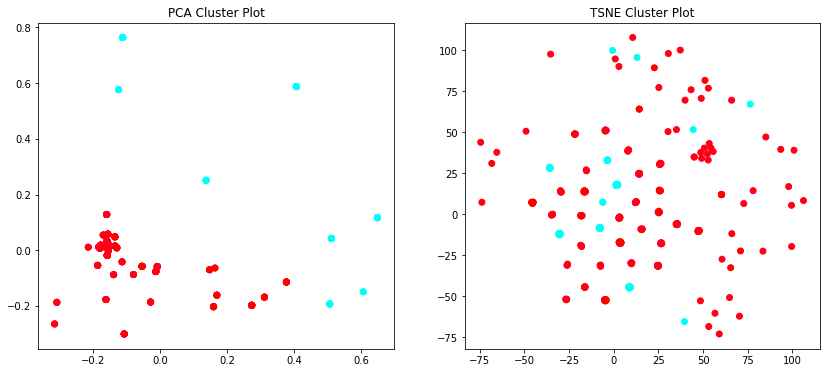

In [76]:
plot_tsne_pca(vectors_TFIDF, clusters_TFIDF)